In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from mpl_toolkits.basemap import Basemap
import glob
import os
import shutil
import re
import cartopy
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import statsmodels.api as sm
#
%matplotlib inline
# %matplotlib notebook
#
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, BoundaryNorm
#
# PD=os.getcwd(); PD


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
def fileNAME(patH,name):
    import glob
    folder_path = patH
    search_term = name   # "glaciers"  # replace with the word you want to search for
    file_pattern = f"{folder_path}/*{search_term}*"  # create a pattern to match files containing the search term
    matching_files = glob.glob(file_pattern)
    if len(matching_files)>1: 
        raise ValueError("There are 2 files with same keyword")
    fnme = os.path.basename(matching_files[0])
    return fnme


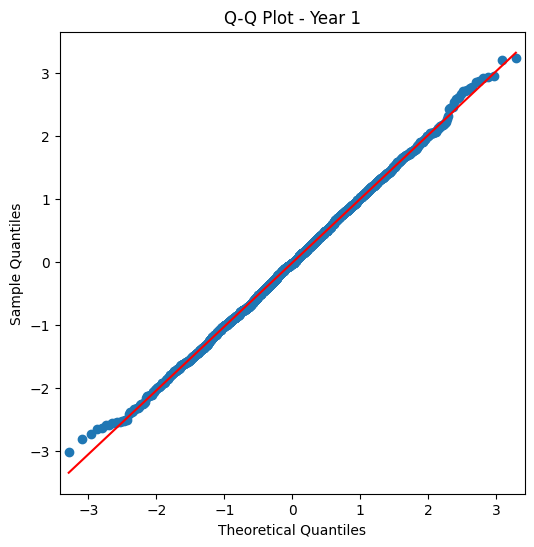

In [2]:
# Generate dataset
np.random.seed(0)
dataset = np.random.normal(loc=0, scale=1, size=(2000, 10))  # Assuming 10 years of data

# Select a specific year for comparison
year_index = 0  # Index of the year column (e.g., 0 for the first year)
year_data = dataset[:, year_index]  # Select the data for the specified year

# Create the Q-Q plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the Q-Q plot for the selected year data
sm.qqplot(year_data, line='s', ax=ax)

# Add labels and title
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')
ax.set_title(f'Q-Q Plot - Year {year_index + 1}')

# Display the plot
plt.show()


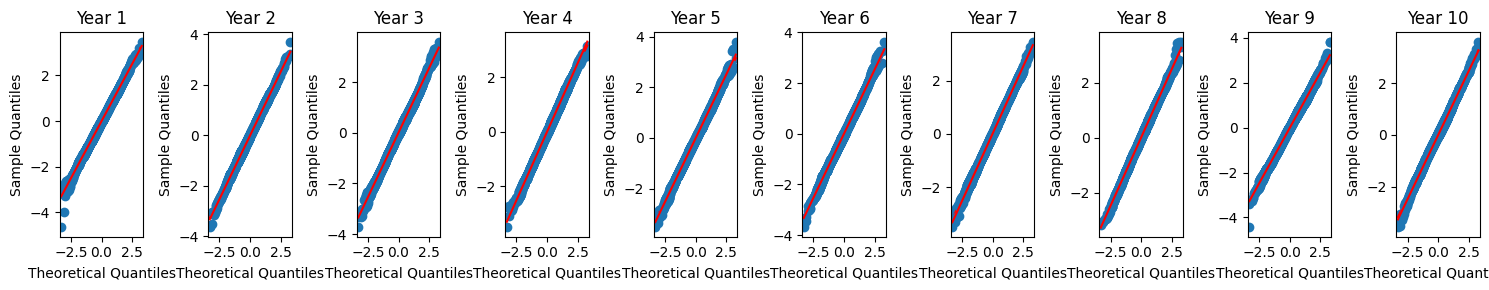

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate sample datasets (replace with your actual datasets)
np.random.seed(0)
dataset1 = np.random.normal(loc=0, scale=1, size=(2000, 10))
dataset2 = np.random.normal(loc=0, scale=1, size=(2000, 10))

# Set the number of columns and rows for the subplots
num_cols = dataset1.shape[1]
num_rows = 1

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3))

# Iterate over the columns
for col in range(num_cols):
    # Select the corresponding columns from each dataset
    data1 = dataset1[:, col]
    data2 = dataset2[:, col]

    # Create Q-Q plot for the current column
    sm.qqplot(data1, line='s', ax=axes[col], color='red')
    sm.qqplot(data2, line='s', ax=axes[col], color='yellow')

    # Add labels and title
    axes[col].set_xlabel('Theoretical Quantiles')
    axes[col].set_ylabel('Sample Quantiles')
    axes[col].set_title(f'Year {col+1}')

# Adjust the layout and spacing
plt.tight_layout()

# Display the plot
plt.show()


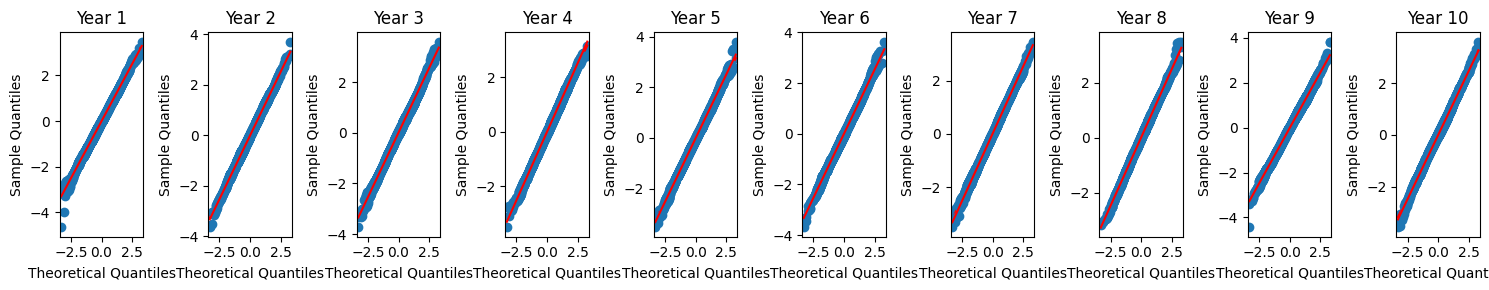

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate sample datasets (replace with your actual datasets)
np.random.seed(0)
dataset1 = np.random.normal(loc=0, scale=1, size=(2000, 10))
dataset2 = np.random.normal(loc=0, scale=1, size=(2000, 10))

# Set the number of columns and rows for the subplots
num_cols = dataset1.shape[1]
num_rows = 1

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3))

# Iterate over the columns
for col in range(num_cols):
    # Select the corresponding columns from each dataset
    data1 = dataset1[:, col]
    data2 = dataset2[:, col]

    # Create Q-Q plot for the current column
    sm.qqplot(data1, line='s', ax=axes[col])
    sm.qqplot(data2, line='s', ax=axes[col])

    # Add labels and title
    axes[col].set_xlabel('Theoretical Quantiles')
    axes[col].set_ylabel('Sample Quantiles')
    axes[col].set_title(f'Year {col+1}')

# Adjust the layout and spacing
plt.tight_layout()

# Display the plot
plt.show()


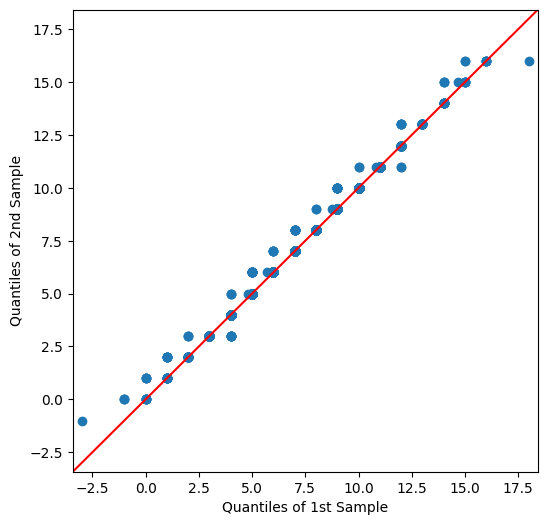

In [3]:
wf="wf_1e"
ssp='ssp585';       
folder='full_sample_workflows'
loc=0

pathG='/projects/kopp/ggg46/nz_projections/regional/{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/001_{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)

fileG=fileNAME(pathG,"AIS")
fileP=fileNAME(pathP,"AIS")
var='sea_level_change'



d_ncG, d_ncP = [xr.open_dataset(os.path.join(path, file)) for path, file in [(pathG, fileG), (pathP, fileP)]]
#
yrST=2020; yrEN=2100; yr=np.arange(yrST, yrEN+1, 10)
yrIDX_G, yrIDX_P=[np.searchsorted(d['years'].values, yr) for d in [d_ncG, d_ncP]]
#         
latP, lonP = [d_ncP[d][loc].values for d in ['lat', 'lon']]

# Compute the difference. 
# slcG=d_ncG[var][:, yrIDX_G, loc];       slcP=d_ncP[var][:, yrIDX_P, loc]
slcG=d_ncG[var][:, 0, loc];       slcP=d_ncP[var][:, 0, loc]


fig, ax = plt.subplots(figsize=(6, 6))
sm.qqplot_2samples(slcG, slcP, line='45', ax=ax)
plt.show()

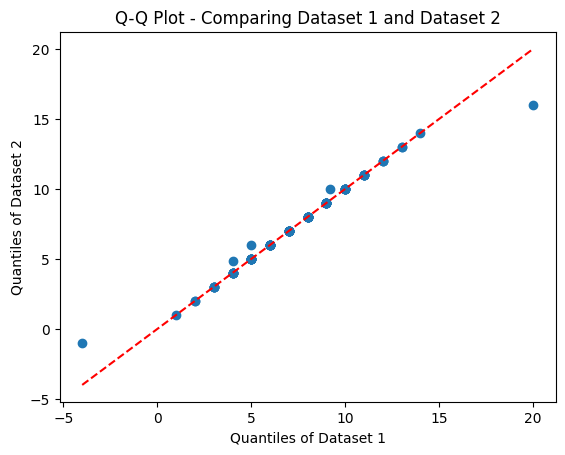

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate two random datasets
np.random.seed(0)
dataset1 = slcG #np.random.normal(loc=0, scale=1, size=(2000, 10))
dataset2 = slcP #np.random.normal(loc=0, scale=1, size=(2000, 10))

# Calculate the quantiles for each dataset
quantiles1 = np.percentile(dataset1, np.linspace(0, 100, 101), axis=0)
quantiles2 = np.percentile(dataset2, np.linspace(0, 100, 101), axis=0)

# Sort the quantiles
quantiles1_sorted = np.sort(quantiles1, axis=0)
quantiles2_sorted = np.sort(quantiles2, axis=0)

# Determine the range of quantiles
min_quantile = np.min([quantiles1_sorted.min(), quantiles2_sorted.min()])
max_quantile = np.max([quantiles1_sorted.max(), quantiles2_sorted.max()])

# Create the Q-Q plot
plt.scatter(quantiles1_sorted, quantiles2_sorted)

# Add the reference line
# plt.plot([-20, 20], [-20, 20], color='red', linestyle='--')
plt.plot([min_quantile, max_quantile], [min_quantile, max_quantile], color='red', linestyle='--')


# Add labels and title
plt.xlabel('Quantiles of Dataset 1')
plt.ylabel('Quantiles of Dataset 2')
plt.title('Q-Q Plot - Comparing Dataset 1 and Dataset 2')

# Display the plot
plt.show()


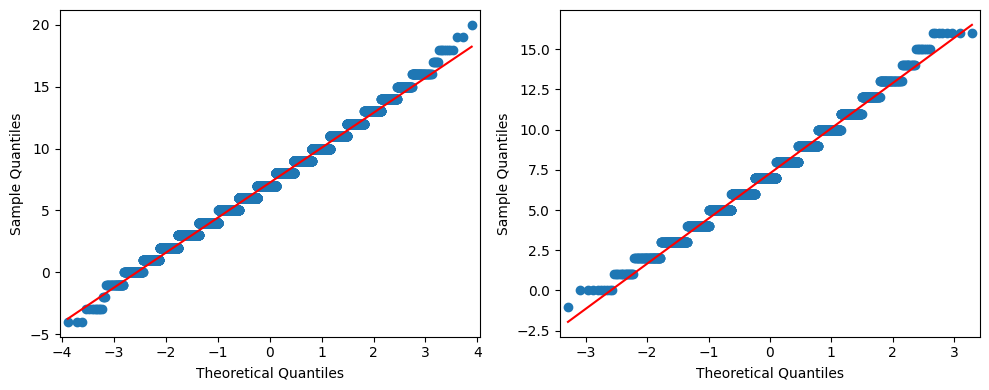

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sm.qqplot(slcG, line='s', ax=axes[0])

sm.qqplot(slcP, line='s', ax=axes[1])


plt.tight_layout()
plt.show()


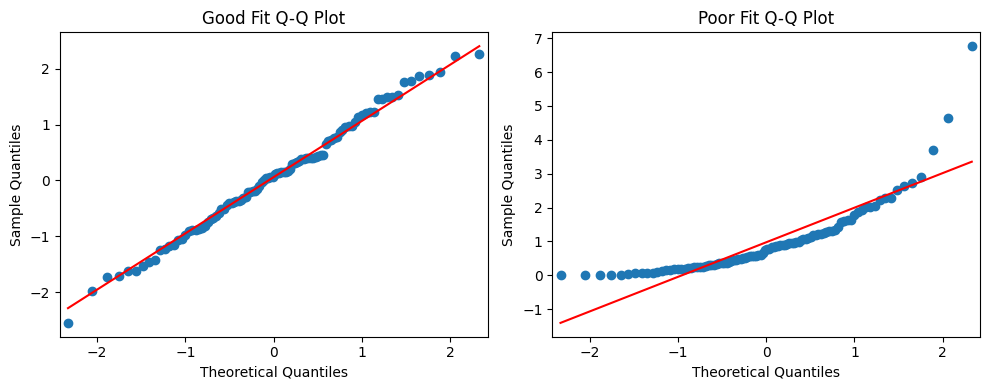

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate two datasets
np.random.seed(0)
good_fit_data = np.random.normal(loc=0, scale=1, size=100)
poor_fit_data = np.random.exponential(scale=1, size=100)

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot Q-Q plot for good fit data
sm.qqplot(good_fit_data, line='s', ax=axes[0])
axes[0].set_xlabel('Theoretical Quantiles')
axes[0].set_ylabel('Sample Quantiles')
axes[0].set_title('Good Fit Q-Q Plot')

# Plot Q-Q plot for poor fit data
sm.qqplot(poor_fit_data, line='s', ax=axes[1])
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Sample Quantiles')
axes[1].set_title('Poor Fit Q-Q Plot')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


## <font> ------------------------ </font>